In [0]:
!pip install wordcloud

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [0]:
path = '/content/drive/My Drive/data/'
filename = 'abbey_rvus_20191030.csv'

In [0]:
df = pd.read_csv(path+filename, index_col=[0], parse_dates=['reviewdate'])
df.describe(include='all')
df.head(3)

,reviewid,reviewdate,full,title,text
0,722158959,2019-10-28,Bath Abbey Work being carried out at moment bu...,Bath Abbey,Work being carried out at moment but still wor...
1,721998650,2019-10-28,Terrific Tower TourWe were visiting Bath for a...,Terrific Tower Tour,We were visiting Bath for a few days so chose ...
2,721668933,2019-10-27,Always a must in a city. This was great the st...,Always a must in a city.,This was great the stain glass windows where s...


# Try it out with just the first review

In [0]:
review0 = df['text'][0]
review0

'Work being carried out at moment but still worth a visit. If feeling fit take guided tour up narrow spiral stairs to top of bell tower. Really worthwhile. Guides are informative and enthusiastic.'

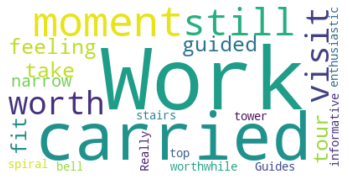

In [0]:
wordcloud = WordCloud(background_color="white").generate(review0)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Apply to every review

Combine all reviews into one big text and create big cloud to see which characteristics are most common for this attraction.

In [0]:
# Create stopword list (don't include these):
stopwords = set(STOPWORDS)
stopwords.update(["Abbey", "abbey", "Bath", "visit", "inside", "building", "see"])

In [0]:
all_txt = " ".join(review for review in df.full)
print ("There are {} words in the combination of all titles.".format(len(all_txt)))

There are 575575 words in the combination of all titles.


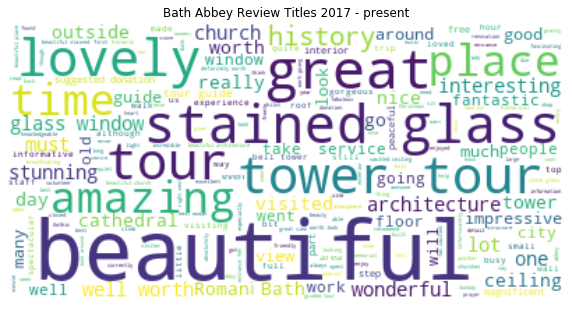

<Figure size 432x288 with 0 Axes>

In [0]:
# generate word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_txt)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("All Bath Abbey Reviews 2017 - present")
plt.axis("off")
plt.show()
plt.savefig('wc_bathabbey.png', format='png', dpi=300)

# If wanted or needed for more aesthetic purposes, a shape mask can be applied to force the wordcloud into the shape of Bath Abbey. 

# Alternatively, play around with the colors (I like these ones though).